# Objetivo. Predicción del destino final de mascotas en un albergue.
L.E. Rojón 

138442

# Introducción

Cada año, aproximadamente 7.6 millones de animales de compañía terminan en refugios de los EE. UU. Muchos animales son abandonados por sus dueños como no deseados, mientras que otros son recogidos después de perderse o de salir de situaciones de crueldad. Muchos de estos animales encuentran familias que los llevan a casa, pero otros tantos no son tan afortunados. 2.7 millones de perros y gatos son sacrificados en los Estados Unidos cada año.

Usando un conjunto de datos de información de admisión del Austin Animal Center que incluye raza, color, sexo y edad, buscamos predecir el desenlace o destino final de cada animal. Los datos van desde el 1 de octubre de 2013 hasta marzo de 2016. Los resultados representan el estado de los animales cuando abandonan el Animal Center. Estos resultados incluyen: adopción, muerte, eutanasia, devolución al propietario y transferencia. Todos los animales reciben una Identificación de Animal única durante su estancia en el refugio.

Este análisis puede ayudar a comprender las tendencias de los animales con ciertas características. Estas ideas podrían ayudar a los refugios a concentrar su energía en animales específicos que necesitan un poco de atención adicional para encontrar un nuevo hogar.

Los datos de entrenamiento y prueba se dividieron aleatoriamente y están incluídos en los archivos que siguen.

   -    train.csv - el conjunto de entrenamiento (26,729 observaciones).
   -    test.csv - el conjunto de prueba (11,456 observaciones).
   
Los datos pueden descargarse de aquí: https://www.kaggle.com/c/shelter-animal-outcomes.

Esta base de datos cuenta con casi 40,000 observaciones y tiene 10 atributos que son como sigue. 

1\.   AnimalID: El número de identificación del animal.

2\.   Name: El nombre del animal.

3\.   DateTime: La fecha en que tuvo su desenlace en el albergue.

4\.   OutcomeType: El tipo de desenlace (si lo adoptaron, regresaron a su dueño, transfirieron o sacrificaron)

5\.   OutcomeSubtype: El subtipo de desenlace.

6\.   AnimalType: El tipo de animal (perro o gato).

7\.    SexuponOutcome: Si esterilizaron al animal o no.

8\.   AgeuponOutcome: La edad del desenlace.

9\.   Breed: La raza.

10\.   Color: El color.

# Metodología
Los datos ya fueron divididos de antemano como entrenamiento y prueba. Esto hace pensar que de antemano se ha prevenido un posible sobreajuste de los modelos. Sin embargo, en la construcción del modelo se optó por ser aún más precavidos. Entonces, del conjunto de entrenamiento extraeremos una nueva partición de datos de entrenamiento y datos de validación. Esto con el fin de añadir una nueva étapa de validación del modelo y prevenir un sobreajuste. También se pensó en combinar los archivos en uno más grande y de ahi hacer las subsecuentes divisiones (entrenamiento, validación y prueba). Pero, al ser bases de datos provenientes de competencias de Kaggle, el archivo test.csv no cuenta con el atributo de interés OutcomeType. Por consiguiente, de los datos del archivo train.csv se obtuvo la partición de datos para la etapa de entrenamiento y datos para la etapa de validación.

En el aprendizaje de máquina, la clasificación es el problema de identificar a qué conjunto de categorías (subpoblaciones) pertenece una nueva observación, sobre la base de un conjunto de datos de formación que contiene observaciones (o instancias) de cuya categoría se conoce la pertenencia (el conjunto de validación en este caso). La clasificación se considera una instancia de aprendizaje supervisado, es decir, el aprendizaje donde está disponible un conjunto de entrenamiento de observaciones correctamente identificadas (como en esta competencia de Kaggle). Este es un problema de clasificación entre los distintos destinos o desenlaces que pueden tener las mascotas (adoptadas, transferidas, sacrificadas, muertas o regresadas a su dueño).

En particular, utilizaremos el algoritmo supervisado del Árbol De Decisión. Un Árbol De Decisión (como un modelo predictivo) toma las observaciones sobre un atributo (representado en las ramas) y lo lleva  a conclusiones sobre el valor objetivo del atributo (representado en las hojas). Se adjunta una imagen del Árbol De Decisión en el archivo tree.png, pero se omite el código que lo generó por ocasionar problemas con el sistema.

Después, utilizamos una mejora natural a este algoritmo utilizando el método conjunto de Bosque Aleatorio. Los métodos conjuntos utilizan algoritmos de aprendizaje múltiples para obtener un mejor rendimiento predictivo que el que podría obtenerse sólo de cualquiera de los algoritmos de aprendizaje constituyentes, llamados algoritmos débiles del algoritmo conjunto. Un método conjunto es mucho más robusto que los métodos débiles que lo conforman. En un método conjunto sus algoritmos individuales pueden ser débiles, pero siempre que el rendimiento de cada uno sea ligeramente mejor que la predicción aleatoria, se puede demostrar que el modelo final converge a un algoritmo fuerte. 

El Bosque Aleatorio es una combinación de árboles predictores tal que cada árbol depende de los valores de un vector aleatorio probado independientemente y con la misma distribución para cada uno de estos. Luego, construye una larga colección de árboles no correlacionados para finalmente promediarlos, otorgando la probabilidad de clase en la mayoría de los casos más precisa que la de los árboles aleatorios.

Finalmente, en un último intento de prevenir un sobreajuste, tomamos un último método conjunto. En algunos problemas, este método puede ser menos susceptible al problema de sobreajuste que otros algoritmos de aprendizaje conjunto como en particular el Bosque Aleatorio, es por esto que hemos decidido utilizarlo para este problema. Este algoritmo es AdaBoost (abreviatura de Adaptive Boosting). Este algoritmo se puede usar para mejorar el rendimiento. El resultado de los otros algoritmos de aprendizaje "débiles" que conforman este método conjunto se combinan en una suma ponderada que representa el resultado final del clasificador potenciado. AdaBoost es adaptativo en el sentido de que los aprendices débiles subsecuentes son ajustados a favor de aquellos casos clasificados erróneamente por clasificadores anteriores. AdaBoost es sensible a datos ruidosos y atípicos. 

La hipótesis del proyecto es que los algoritmos de la familia de árboles de decisión (Árbol De Decisión, Bosque Aleatorio y AdaBoost) resultan buenos modelos de clasifición para este problema.

Primero, se hace un análisis exploratorio de los datos para determinar los atributos de interés de la base de datos para la tarea en cuestión, predecir la variable 'OutcomeType' que representa el desenlace o destino final de los animales.

Segundo, ya que se transformaron los datos al formato necesario para la modelación, tomamos estos datos modificados y creamos un conjunto de entrenamiento con el que el algoritmo "aprende" primero, otro de validación con el que afinaremos el desempeño del algoritmo y otro de prueba con el que evaluaremos el desempeño final del algoritmo, proponiendo mejoras u otros algoritmos que tuvieran teóricamente desempeño distinto a estos.

# Reporte
A continuación, comenzamos con un análisis exploratorio de los datos para seleccionar los atributos relevantes para la construcción de los algoritmos. Primero, cargamos algunas librerias a utilizar.

In [1]:
import sys
import graphviz
import pydotplus
import collections
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt  
import random as rn
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from random import random,randint,seed,sample 
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn import tree 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score 
from sklearn.cluster import KMeans 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
from datetime import datetime

Definimos las funciones con las que modificaremos los datos para hacer el análisis exploratorio y encontrar los atributos de interés.

In [2]:
def edad_categorica(x):
    if x < 3: return 'Joven'
    if x < 5: return 'AdultoJoven'
    if x < 10: return 'Adulto'
    return 'Viejo'
def edad_anios(x):
    x = str(x)
    if x == 'nan': return 0
    age = int(x.split()[0])
    if x.find('year') > -1: return age 
    if x.find('month')> -1: return age / 12.
    if x.find('week')> -1: return age / 52.
    if x.find('day')> -1: return age / 365.
    else: return 0
def Transforma(data, train):
    data['TieneNombre'] = data['Name'].fillna(0)
    data.loc[data['TieneNombre'] != 0,"TieneNombre"] = 1
    data['TieneNombre'] = data['TieneNombre'].astype(int)
    data['AnimalType'] = data['AnimalType'].map({'Cat':0,'Dog':1})

    if(train):
        data.drop(['AnimalID','OutcomeSubtype'],axis=1, inplace=True)
        data['OutcomeType'] = data['OutcomeType'].map({'Return_to_owner':4, 'Euthanasia':3, 'Adoption':0, 'Transfer':5, 'Died':2})
            
    gender = {'Neutered Male':1, 'Spayed Female':2, 'Intact Male':3, 'Intact Female':4, 'Unknown':5, np.nan:0}
    data['SexuponOutcome'] = data['SexuponOutcome'].map(gender)

    def agetodays(x):
        try:
            y = x.split()
        except:
            return None 
        if 'year' in y[1]:
            return float(y[0]) * 365
        elif 'month' in y[1]:
            return float(y[0]) * (365/12)
        elif 'week' in y[1]:
            return float(y[0]) * 7
        elif 'day' in y[1]:
            return float(y[0])
        
    data['EdadEnDias'] = data['AgeuponOutcome'].map(agetodays)
    data.loc[(data['EdadEnDias'].isnull()),'EdadEnDias'] = data['EdadEnDias'].median()

    data['Nombre+Genero'] = data['TieneNombre'] + data['SexuponOutcome']
    data['Tipo+Genero'] = data['AnimalType'] + data['SexuponOutcome']
    data['EsMezcla'] = data['Breed'].str.contains('mix',case=False).astype(int)
       
    return data.drop(['AgeuponOutcome','Name','Breed','Color','DateTime'],axis=1)
def genero(x):
    x = str(x)
    if x.find('Male') >= 0: return 'Macho'
    if x.find('Female') >= 0: return 'Hembra'
    return 'unknown'
def esteril(x):
    x = str(x)
    if x.find('Spayed') >= 0: return 'Esterilizado'
    if x.find('Neutered') >= 0: return 'Esterilizado'
    if x.find('Intact') >= 0: return 'Intacto'
    return 'No_se_sabe'
def raza(x):
    x = str(x)
    if x.find('Mix') >= 0: return 'Mezcla'
    return 'not'

Cargamos los datos y rápidamente se examinan sus características generales para comenzar la familearización con ellos.

In [3]:
animals_train = pd.read_csv('train.csv')
animals_test = pd.read_csv('test.csv')
pd_train = pd.read_csv('train.csv')
pd_test = pd.read_csv('test.csv')
pd_train.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [4]:
animals_train.describe()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,26729,19038,26729,26729,13117,26729,26728,26711,26729,26729
unique,26729,6374,22918,5,16,2,5,44,1380,366
top,A705677,Max,2015-08-11 00:00:00,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,1,136,19,10769,7816,15595,9779,3969,8810,2824


Transformamos los datos y comenzamos el análisis exploratorio.

In [5]:
pd_train = Transforma(pd_train,True)
pd_test = Transforma(pd_test,False)
pd_test.drop('ID',inplace=True,axis=1)
train = pd_train.values
test = pd_test.values
animals_train['Sexo'] = animals_train.SexuponOutcome.apply(genero)
animals_train['Esterilizado'] = animals_train.SexuponOutcome.apply(esteril)
animals_train['Mezcla'] = animals_train.Breed.apply(raza)
animals_test['Sexo'] = animals_test.SexuponOutcome.apply(genero)
animals_test['Esterilizado'] = animals_test.SexuponOutcome.apply(esteril)
animals_test['Mezcla'] = animals_test.Breed.apply(raza)
animals_train['EdadEnAnios'] = animals_train.AgeuponOutcome.apply(edad_anios)
animals_test['EdadEnAnios'] = animals_train.AgeuponOutcome.apply(edad_anios)
animals_train['EdadEnCategoria'] = animals_train.EdadEnAnios.apply(edad_categorica)
animals_test['EdadEnCategoria'] = animals_train.EdadEnAnios.apply(edad_categorica)
pd_train.head()

,OutcomeType,AnimalType,SexuponOutcome,TieneNombre,EdadEnDias,Nombre+Genero,Tipo+Genero,EsMezcla
0,4,1,1,1,365.0,2,2,1
1,3,0,2,1,365.0,3,2,1
2,0,1,1,1,730.0,2,2,1
3,5,0,3,0,21.0,3,3,1
4,5,1,1,0,730.0,1,2,0


En el albergue hay más perros que gatos.

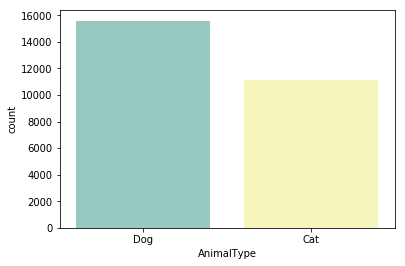

In [6]:
sns.countplot(animals_train.AnimalType, palette='Set3')

Los animales de este albergue tienen mucha suerte, en su mayoría los adoptan o los transfieren a un nuevo hogar. Casi no mueren ni son sacrificados.

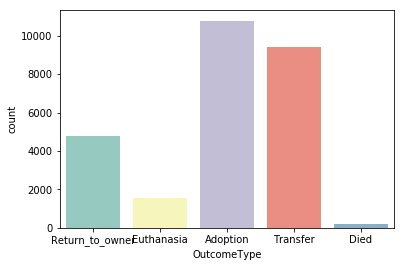

In [7]:
sns.countplot(animals_train.OutcomeType, palette='Set3')

Parece ser que no existe gran diferencia entre el sexo de las mascotas.

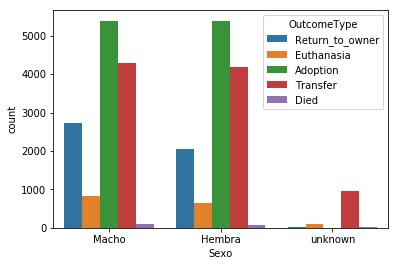

In [8]:
sns.countplot(data=animals_train, x='Sexo',hue='OutcomeType')

Los perros son más propensos a ser adoptados mientras que los gatos son más propensos a ser transferidos. 

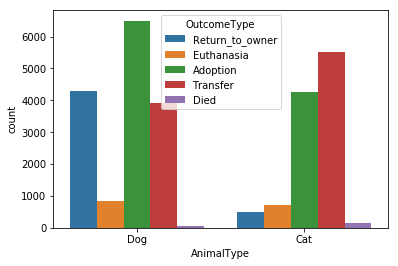

In [9]:
sns.countplot(data=animals_train, x='AnimalType',hue='OutcomeType')

Lo esterilizados son los que más adoptan y los intactos son transferidos con mayor frecuencia.

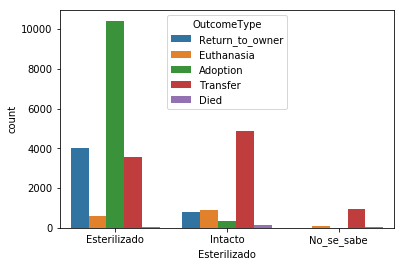

In [10]:
sns.countplot(data=animals_train, x='Esterilizado',hue='OutcomeType')

En su mayoría, el albergue consta de cachorros, la mayor cantidad de observaciones está entre 0-1 año de edad.

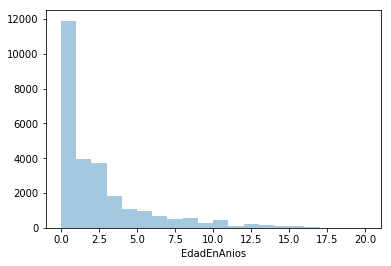

In [11]:
sns.distplot(animals_train.EdadEnAnios, bins = 20, kde=False)

Viéndolo categóricamente.

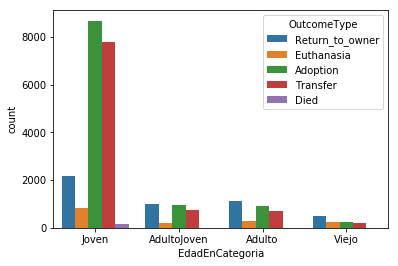

In [12]:
sns.countplot(data=animals_train, x='EdadEnCategoria',hue='OutcomeType')

Ahora que hemos escogido los atributos de interés, comenzamos la construcción de algoritmos dividiendo los datos de prueba en prueba y validación.

In [13]:
X=np.array(pd_train.iloc[:,1:10])
y=np.array(pd_train.iloc[:,0])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=6)
scalerx = preprocessing.StandardScaler().fit(X_train)
X_train=scalerx.transform(X_train)
X_test=scalerx.transform(X_test)

Comenzamos implementando el Árbol De Decisión.

('Precision en validacion del Arbol De Decision:', 65.827994201000791, '%')
             precision    recall  f1-score   support

          0       0.65      0.84      0.73      2156
          2       0.50      0.03      0.05        40
          3       0.55      0.18      0.27       302
          4       0.48      0.44      0.46       959
          5       0.76      0.63      0.69      1889

avg / total       0.65      0.65      0.64      5346

[[1819    0    5  213  119]
 [   3    1    1    3   32]
 [  39    0   54   75  134]
 [ 442    0    8  420   89]
 [ 501    1   31  159 1197]]


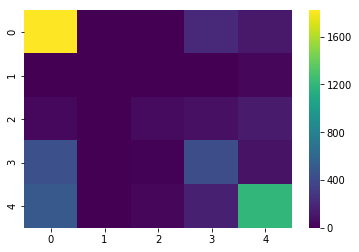

In [14]:
arbol=DecisionTreeClassifier()
arbol.fit(X_train,y_train)
predar=arbol.predict(X_test) 
precisionArbol=arbol.score(X_train,y_train)
print("Precision en validacion del Arbol De Decision:",precisionArbol*100,"%") 
print(classification_report(y_test,predar))
print(confusion_matrix(y_test,predar))
cm=confusion_matrix(y_test,predar)
sns.heatmap(cm,cmap='viridis')

Vemos que su precisión es aceptable para este problema pues es del 65%, entonces aparentemente no existe un sobre ajuste.
Evaluemos ahora el modelo con el conjunto de prueba.

In [15]:
predictionsArbol = arbol.predict_proba(test)
precisionPrueba=arbol.score(train[:,1:10],train[:,0])
output = pd.DataFrame(predictionsArbol,columns=['Adoptado','Muerto','Euthanasia','Regresa_al_duenio','Transferido'])
output.columns.names = ['ID']
output.index.names = ['ID']
output.index += 1
print("Precision en la prueba del Arbol De Decision:",precisionPrueba*100,"%")  
print("Predecimos con el Arbol De Decision,")
print("la probabilidad del animal de tener cierto desenlace, \n")
print(output)

('Precision en la prueba del Arbol De Decision:', 17.905645553518649, '%')
Predecimos con el Arbol De Decision,
la probabilidad del animal de tener cierto desenlace, 

ID     Adoptado  Muerto  Euthanasia  Regresa_al_duenio  Transferido
1           0.0     0.0         0.0                1.0          0.0
2           0.0     0.0         0.0                1.0          0.0
3           0.0     0.0         0.0                1.0          0.0
4           0.0     0.0         0.0                1.0          0.0
5           0.0     0.0         0.0                1.0          0.0
6           0.0     0.0         0.0                1.0          0.0
7           0.0     0.0         0.0                1.0          0.0
8           0.0     0.0         0.0                1.0          0.0
9           0.0     0.0         0.0                1.0          0.0
10          0.0     0.0         0.0                1.0          0.0
11          0.0     0.0         0.0                1.0          0.0
12          0.0 

Ahora la precisión se fue a casi el 13%. Nótese que las probabilidades de clase son muy certeras. Esto implica que verdaderamente existía un sobreajuste a los datos.

Probemos ahora el método conjunto de Bosque Aleatorio.

('Precision en validacion del Bosque Aleatorio:', 65.827994201000791, '%')
             precision    recall  f1-score   support

          0       0.65      0.84      0.73      2156
          2       0.00      0.00      0.00        40
          3       0.58      0.17      0.27       302
          4       0.48      0.44      0.46       959
          5       0.76      0.64      0.69      1889

avg / total       0.65      0.65      0.64      5346

[[1812    0    2  215  127]
 [   3    0    2    3   32]
 [  39    0   52   73  138]
 [ 440    0    5  419   95]
 [ 489    1   28  158 1213]]


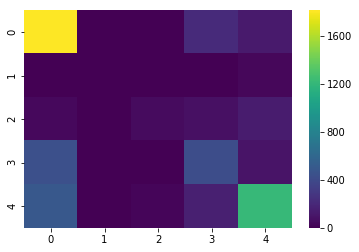

In [17]:
bosque = RandomForestClassifier(n_estimators = 400, max_features='auto')
bosque.fit(X_train,y_train)
predbo=bosque.predict(X_test) 
precisionBosque=bosque.score(X_train,y_train)
print("Precision en validacion del Bosque Aleatorio:",precisionBosque*100,"%") 
print(classification_report(y_test,predbo))
print(confusion_matrix(y_test,predbo))
cm=confusion_matrix(y_test,predbo)
sns.heatmap(cm,cmap='viridis')

Notar que a pesar de que cambia la matriz de confusión con respecto a la matriz de confusión del Árbol De Decisión, la precisión es la misma. Esto no da buena espina, pues el Bosque Aleatorio es un método conjunto que utiliza al Árbol De Decisión como su algoritmo débil. 

El hecho que las matrices de confusión sean tan similares y que la precisión  y demás métricas de desempeño sean iguales lleva a considerar que este conjunto de datos es un caso atípico donde la precisión del Bosque Aleatorio alcanza su peor rendimiento. Esto es tiene la precisión de su algoritmo débil, el Árbol Aleatorio. Veamos que dicen los datos de prueba.

In [19]:
predictionsBosque = bosque.predict_proba(test)
precisionPruebaB=bosque.score(train[:,1:10],train[:,0])
output = pd.DataFrame(predictionsBosque,columns=['Adoptado','Muerto','Euthanasia','Regresa_al_duenio','Transferido'])
output.columns.names = ['ID']
output.index.names = ['ID']
output.index += 1
print("Precision en la prueba del Bosque Aleatorio:",precisionPruebaB*100,"%")  
print("Predecimos con el Bosque Aleatorio,")
print("la probabilidad del animal de tener cierto desenlace, \n")
print(output)

('Precision en la prueba del Bosque Aleatorio:', 13.502188634067865, '%')
Predecimos con el Bosque Aleatorio,
la probabilidad del animal de tener cierto desenlace, 

ID     Adoptado  Muerto  Euthanasia  Regresa_al_duenio  Transferido
1      0.000000     0.0    0.812345           0.186155     0.001500
2      0.000000     0.0    0.590369           0.408131     0.001500
3      0.128058     0.0    0.218295           0.602856     0.050792
4      0.000000     0.0    0.812345           0.186155     0.001500
5      0.093804     0.0    0.236459           0.669737     0.000000
6      0.093804     0.0    0.236459           0.669737     0.000000
7      0.128058     0.0    0.218295           0.602856     0.050792
8      0.000000     0.0    0.470224           0.528276     0.001500
9      0.000000     0.0    0.590369           0.408131     0.001500
10     0.000000     0.0    0.590369           0.408131     0.001500
11     0.000000     0.0    0.590369           0.408131     0.001500
12     0.000000   

Nuevamente tenemos probabilidades de clase bastante sesgadas y una disminución crítica de precisión de nuevo a 13%. Esto implica que este conjunto de datos es uno de los casos atípicos donde Bosques Aleatorios sólo logra alcanzar la misma precisión que el Árbol De Decisión. En efecto, la reducción crítica de la precisión implica que el Bosque Aleatorio sobreajusta los datos, como su algoritmo débil, el Árbol De Decisión.

Tratemos de corregir esto utilizando ahora el método conjunto de AdaBoost.

('Precision en validacion de AdaBoost:', 63.326006640789409, '%')
             precision    recall  f1-score   support

          0       0.64      0.84      0.73      2156
          2       0.00      0.00      0.00        40
          3       0.38      0.12      0.18       302
          4       0.49      0.38      0.43       959
          5       0.73      0.65      0.69      1889

avg / total       0.63      0.64      0.62      5346

[[1806    0    2  210  138]
 [   3    0    1    3   33]
 [  45    0   36   50  171]
 [ 452    0   22  365  120]
 [ 496    0   35  124 1234]]


/home/luxorville/virtualenvs/ML/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


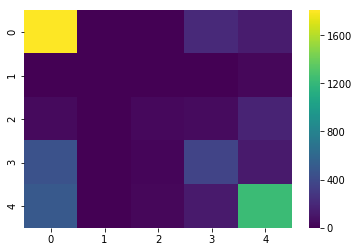

In [20]:
AB=AdaBoostClassifier()
AB.fit(X_train,y_train)
predAB=AB.predict(X_test)
precisionAB=AB.score(X_train,y_train)
print("Precision en validacion de AdaBoost:",precisionAB*100,"%") 
print(classification_report(y_test,predAB))
print(confusion_matrix(y_test,predAB))
cm=confusion_matrix(y_test,predAB)
sns.heatmap(cm,cmap='viridis')

Ahora la precisión junto con las otras métricas de desempeño se disminuyeron. Está pérdida de precisión inicial no es tan grave y es hasta cierto punto aceptable si se logró que este método corrigiera el sobreajuste de los métodos anteriores.

Veamos si esto ocurrió.

In [19]:
predictionsAB = AB.predict_proba(test)
precisionPruebaAB=AB.score(train[:,1:10],train[:,0])
output = pd.DataFrame(predictionsAB,columns=['Adoptado','Muerto','Euthanasia','Regresa_al_duenio','Transferido'])
output.columns.names = ['ID']
output.index.names = ['ID']
output.index += 1
print("Precision en la prueba de AdaBoost:",precisionPruebaAB*100,"%")  
print("Predecimos con AdaBoost,")
print("la probabilidad del animal de tener cierto desenlace, \n")
print(output)

('Precision en la prueba de AdaBoost:', 5.881252572112686, '%')
Predecimos con AdaBoost,
la probabilidad del animal de tener cierto desenlace, 

ID     Adoptado    Muerto  Euthanasia  Regresa_al_duenio  Transferido
1      0.121005  0.115544    0.258840           0.257096     0.247514
2      0.216007  0.104332    0.231377           0.227161     0.221124
3      0.217804  0.104083    0.231543           0.226869     0.219700
4      0.121005  0.115544    0.258840           0.257096     0.247514
5      0.216395  0.104113    0.231125           0.227969     0.220398
6      0.216395  0.104113    0.231125           0.227969     0.220398
7      0.217804  0.104083    0.231543           0.226869     0.219700
8      0.216007  0.104332    0.231377           0.227161     0.221124
9      0.216007  0.104332    0.231377           0.227161     0.221124
10     0.216007  0.104332    0.231377           0.227161     0.221124
11     0.216007  0.104332    0.231377           0.227161     0.221124
12     0.121005

El rendimiento bajo aún más críticamente que en los otros dos métodos anteriores hasta tan sólo un 5%. Por lo tanto, AdaBoost no logra solucionar el problema de sobreajuste.

# Conclusiones

Al implementar los algoritmos de la familia de árboles de decisión no obtuvimos resultados satisfactorios para este problema de clasificación. Vemos que para estos datos el algoritmo del Árbol De Decisión sobreajusta los datos. Tratamos de corregirlo utilizando el método conjunto que lo utiliza como algoritmo débil, el Bosque Aleatorio. 

Sin embargo, tampoco fue posible mejorar la precisión. Más aún, se obtuvo el peor caso de Bosque Aleatorio, en el que la precisión coincidía con la del Árbol De Decisión. Es decir, persistía el sobreajuste. Para corregir esto se decidió implementar el algoritmo AdaBoost. Pero, ahora notamos que este problema es un caso degenerado en donde el sobreajuste persistió y la presición disminuyo críticamente en la etapa de prueba.

No se sugiere reducir atributos, pues es facil corroborar que eso no mejorará la precisión. Lo que se sugiere es utilizar otro tipo de métodos para hacer clasificación categórica o implementar algún tipo de regularización sobre el error, por ejemplo, penalizar los datos extraños como las inconsistencias en observaciones (datos no registrados o desconocidos). En particular, se considera que una implementación de redes neuronales o de regresión logística podrían generar un algoritmo de clasificación mucho más preciso para este problema.

# Bibliografia
- Shelter Animal Outcomes, reto de Kaggle, disponible en línea en https://www.kaggle.com/c/shelter-animal-outcomes.
- Presentaciones del profesor Fernando Esponda para el curso de Aprendizaje de Máquina, Otoño 2017, ITAM. Disponibles en línea en https://github.com/ClaseML-2017/MaterialyTareas/tree/master/clases.
